In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/CSE_151A/Proj1/credit_card_approval.csv'
df = pd.read_csv(file_path)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [ ]:
df.isna().any()

,0
ID,False
CODE_GENDER,False
FLAG_OWN_CAR,False
FLAG_OWN_REALTY,False
CNT_CHILDREN,False
AMT_INCOME_TOTAL,False
NAME_EDUCATION_TYPE,False
NAME_FAMILY_STATUS,False
NAME_HOUSING_TYPE,False
DAYS_BIRTH,False


No missing data in all columns.

The `ID` is the id of the credit card holder/

ID
5099971    61
5048074    61
5024524    61
5069060    61
5139489    61
           ..
5024036     1
5117797     1
5024364     1
5036401     1
5045855     1
Name: count, Length: 25134, dtype: int64


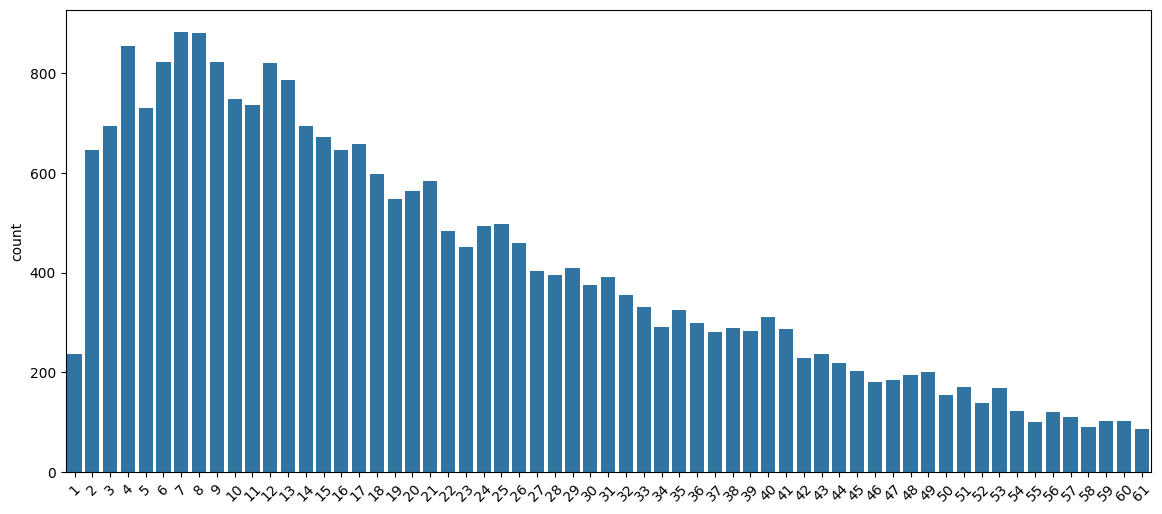

In [ ]:
# Examine the `ID` column of the dataset
id_count = df['ID'].value_counts()
print(id_count)
# The below line groups id_count by the values (i.e., the frequency of each ID)
# and then counts how many times each frequency occurs.
id_gb = id_count.groupby(by=id_count.values).count()

plt.figure(figsize=(14, 6))
sns.barplot(id_gb)
plt.xticks(rotation=45)
plt.show()

Based on the graph, distribution of observations for each id is skewed to the right, meaning that most ids don't have that much observations on them (>=30).

The `CODE_GENDER` is the gender of the credit card holder, with `F` being female and `M` being male.

CODE_GENDER
F    333832
M    203835
Name: count, dtype: int64
The number of Female in the dataset: 333832
The number of Male in the dataset: 203835


<ipython-input-25-c37e460f91b9>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The number of Female in the dataset:', cg_count[0])
<ipython-input-25-c37e460f91b9>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The number of Male in the dataset:', cg_count[1])


<Axes: xlabel='CODE_GENDER', ylabel='count'>

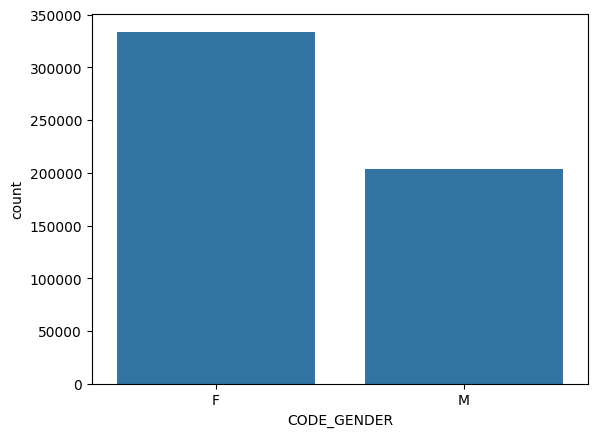

In [ ]:
# Examine the `CODE_GENDER` column of the dataset
cg_count = df['CODE_GENDER'].value_counts()
print(cg_count)
print('The number of Female in the dataset:', cg_count[0])
print('The number of Male in the dataset:', cg_count[1])

sns.barplot(cg_count)

There's about twice amount of female credit card holder than male holder. Because it is a non-ordinal categorical value, we will perform one-hot encoding on the column.

The `FLAG_OWN_CAR` is about whether the credit card holder has a car, with `Y` being yes and `N` being no.

FLAG_OWN_CAR
N    306207
Y    231460
Name: count, dtype: int64
The number of clients who don't own a car in the dataset: 306207
The number of clients who own a car in the dataset: 231460


<ipython-input-30-b6551303f0de>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The number of clients who don\'t own a car in the dataset:', foc_count[0])
<ipython-input-30-b6551303f0de>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The number of clients who own a car in the dataset:', foc_count[1])


<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

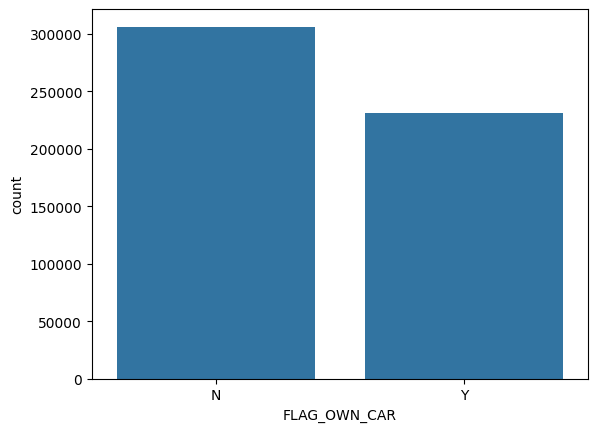

In [ ]:
# Examine the `FLAG_OWN_CAR` column of the dataset
foc_count = df['FLAG_OWN_CAR'].value_counts()
print(foc_count)
print('The number of clients who don\'t own a car in the dataset:', foc_count[0])
print('The number of clients who own a car in the dataset:', foc_count[1])

sns.barplot(foc_count)

The difference between the values are not as signifcant as other columns, there for the distribution is not a huge concern. Because it is a non-ordinal categorical value, we will perform one-hot encoding on the column.

The `FLAG_OWN_REALTY` is about whether the credit card holder has a property, with `Y` being yes and `N` being no.

The number observations without property in the dataset: 192196
The number observations with property in the dataset: 345471


<ipython-input-31-587ca53e46f4>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The number observations without property in the dataset: {for_count[1]}')
<ipython-input-31-587ca53e46f4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The number observations with property in the dataset: {for_count[0]}')


<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

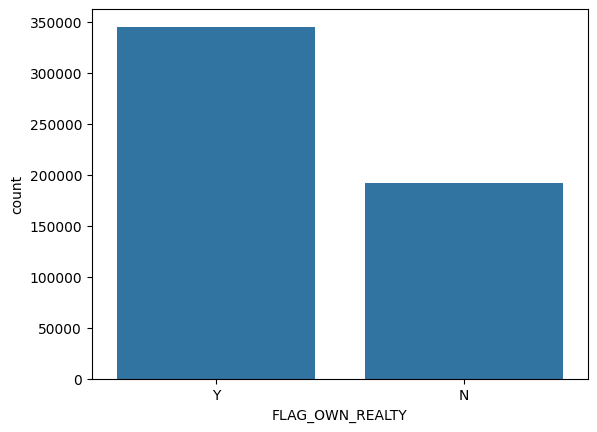

In [ ]:
# Examine the `FLAG_OWN_REALTY` column of the dataset
for_count = df['FLAG_OWN_REALTY'].value_counts()
print(f'The number observations without property in the dataset: {for_count[1]}')
print(f'The number observations with property in the dataset: {for_count[0]}')

sns.barplot(for_count)

Although there are still significantly more observations with property, the difference is less drastic compared to some other columns. Because it is a non-ordinal categorical value, we will perform one-hot encoding on the column.

The `CNT_CHILDREN` column is about how many children the credit card holder of the observation has, which ranges from no children to 2 or more children.

CNT_CHILDREN
No children    343151
1 children     127695
2+ children     66821
Name: count, dtype: int64


<Axes: xlabel='CNT_CHILDREN', ylabel='count'>

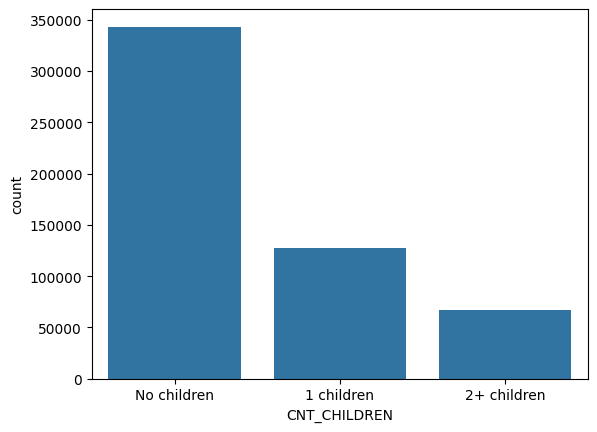

In [ ]:
# Examine the `CNT_CHILDREN` column of the dataset
cc_count = df['CNT_CHILDREN'].value_counts()
print(cc_count)

sns.barplot(cc_count)

There are significantly more observation belonging to `No children` category than other categories. This is yet another categorical column, in which we could use either one-hot encoding or ordinal encoding. In this case, we are more inclined to do ordinal encoding since `2+ children` can be considered more "significant" than `No children`.

The `FLAG_EMAIL` column contains whether there is an email, `1` being yes and `0` being no.

The number observations without email in the dataset: 483508
The number observations with email in the dataset: 54159


<Axes: xlabel='FLAG_EMAIL', ylabel='count'>

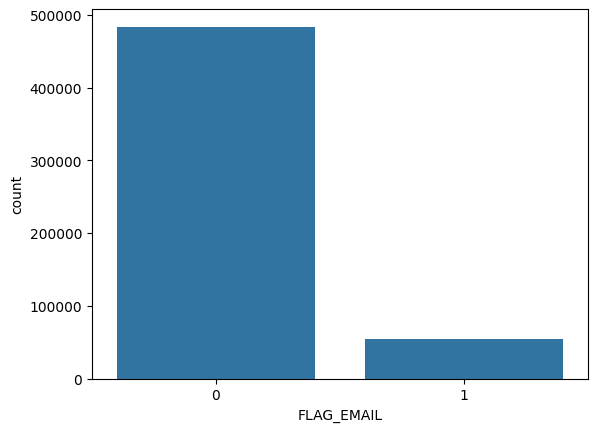

In [ ]:
# Examine the `FLAG_EMAIL` column of the dataset
fe_count = df['FLAG_EMAIL'].value_counts()
print(f'The number observations without email in the dataset: {fe_count[0]}')
print(f'The number observations with email in the dataset: {fe_count[1]}')

sns.barplot(fe_count)

As seen from the numbers and the visualization, there are significantly more observations of users without email than with email. Due to the significant difference in the observations, we may need to take into consideration the ratio of with vs. without users in the training set so our model is not skrewed.

The `JOB` column denotes the job of the credit holder, represented by strings of the name of the occupation.

JOB
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64


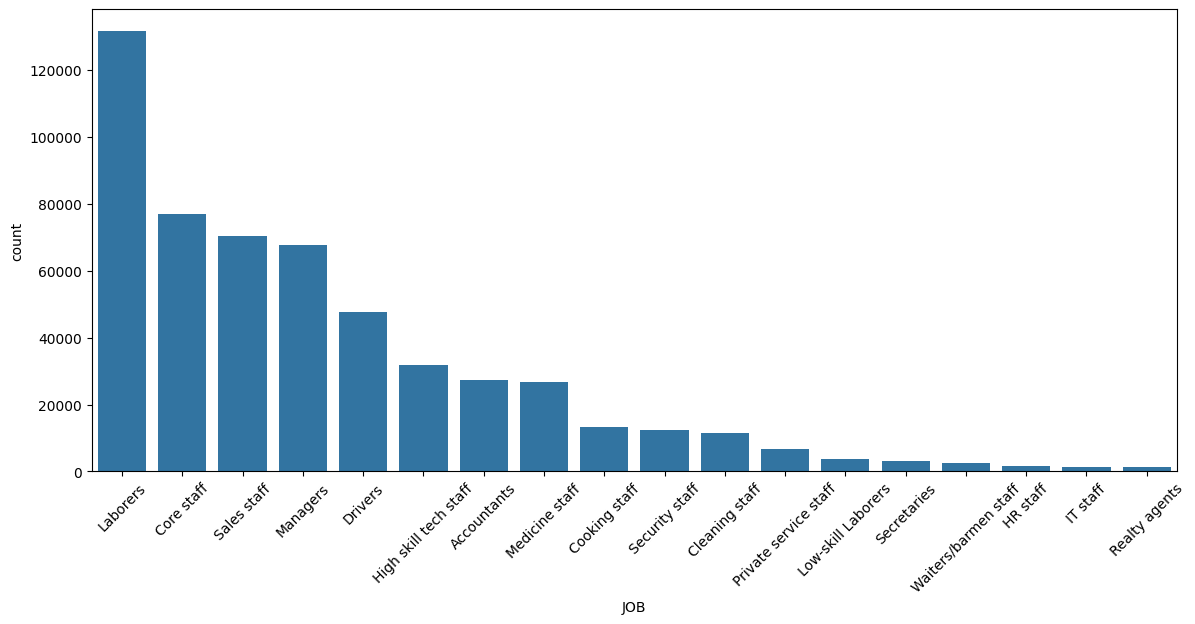

In [ ]:
# Examine the `JOB` column of the dataset
job_count = df['JOB'].value_counts()
print(job_count)

plt.figure(figsize=(14, 6))
sns.barplot(job_count)
plt.xticks(rotation=45)
plt.show()

It seems that there's a uneven distribution of occupations. However, it may be due to a variety of reasons such as newer positions has less observations for them because of how new they are.

The `BEGIN_MONTHS` column of the dataset represents how long ago was the observation from with `0` being the closes month and the smallest value being the furtherest month

BEGIN_MONTHS
-60      207
-59      431
-58      668
-57      858
-56     1080
       ...  
-4     16795
-3     17061
-2     17203
-1     17271
 0     17043
Name: count, Length: 61, dtype: int64


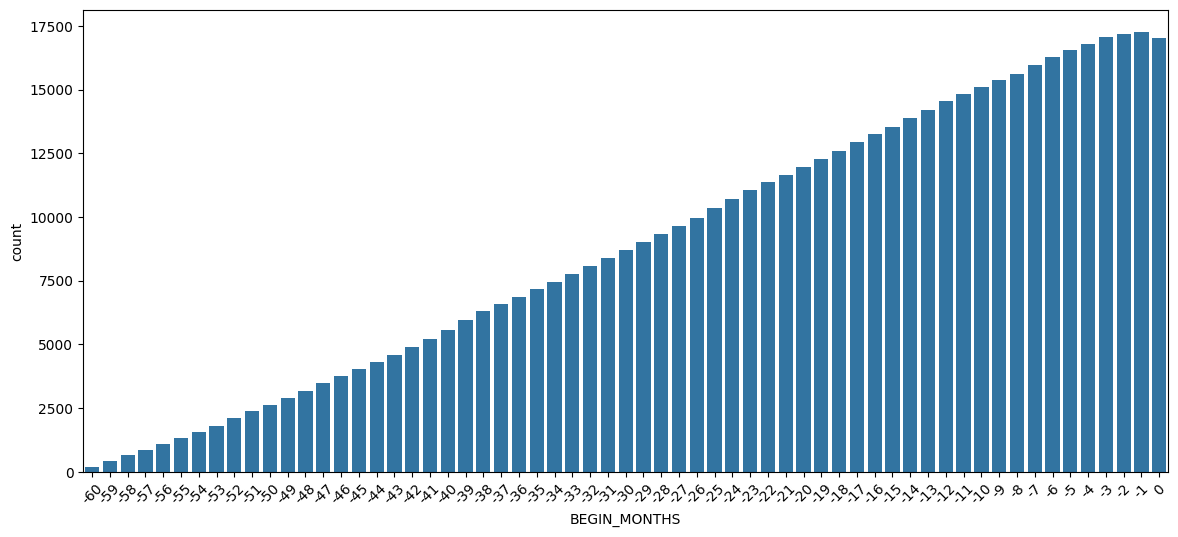

In [ ]:
# Examine the `BEGIN_MONTHS` column of the dataset
BM_count = df['BEGIN_MONTHS'].value_counts().sort_index()
print(BM_count)

plt.figure(figsize=(14, 6))
sns.barplot(BM_count)
plt.xticks(rotation=45)
plt.show()

By looking at the graph and the numbers, the distribution of the data is skrewed towards one side. It is a categorical value so we would need to encode it if we do end up choosing it. If so, it is likely to be one-hot encoding since the one month after/before does not have significant more/less meaning in the question that we are trying to ask.

The `STATUS` column of the dataset uses `0`, `1`, `2`, `3`, `4`, `5`, `C`, and `X` to represent how late the payments to credit cards are:

- `0`: 1-29 days past due

- `1`: 30-59 days past due

- `2`: 60-89 days overdue

- `3`: 90-119 days overdue

- `4`: 120-149 days overdue

- `5`: Overdue or bad debts, write-offs for more than 150 days

- `C`: paid off that month

- `X`: No loan for the month

Although the column contains numerical values, but they are categorical values instead.

STATUS
0    200930
1      6423
2       542
3       181
4       152
5      1087
C    226185
X    102167
Name: count, dtype: int64


<Axes: xlabel='STATUS', ylabel='count'>

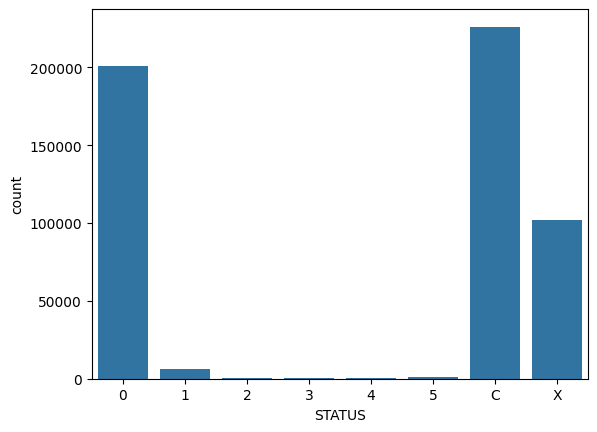

In [ ]:
# Examine the `STATUS` column of the dataset
status_count = df['STATUS'].value_counts().sort_index()
print(status_count)
sns.barplot(status_count)

Based on the numbers and the graph, the `STATUS` column is dominated by three categories of observations, which are `0`, `C`, and `X`. To work with the column, not only will we need to encode the categorical values (one-hot or ordinal), but we also need to make sure the training set contains a fair proportion of every category.

The `TARGET` column of the dataset uses `1` to mark risk users and use `0` otherwise

TARGET
0    535705
1      1962
Name: count, dtype: int64
The number of non-risk users in the dataset: 535705
The number of risk users in the dataset: 1962


<Axes: xlabel='TARGET', ylabel='count'>

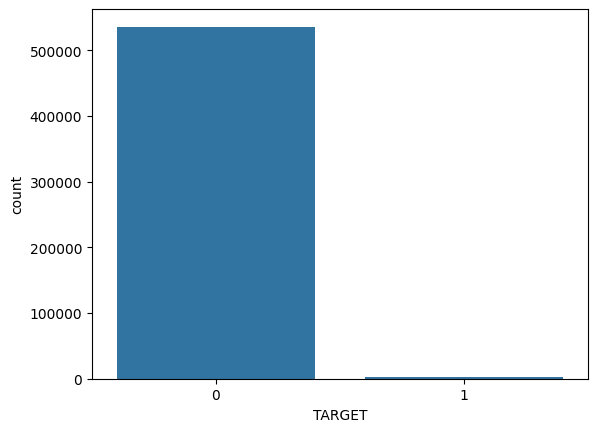

In [ ]:
# Examine the `TARGET` column of the dataset
target_count = df['TARGET'].value_counts()
print(f'The number of non-risk users in the dataset: {target_count[0]}')
print(f'The number of risk users in the dataset: {target_count[1]}')

sns.barplot(target_count)

As seen from the numbers and the visualization, there are significantly more observations of non-risk users than risk users. Due to the significant difference in the observations, we may need to take into consideration the ratio of risk vs. non-risk users in the training set so our model is not skrewed.

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

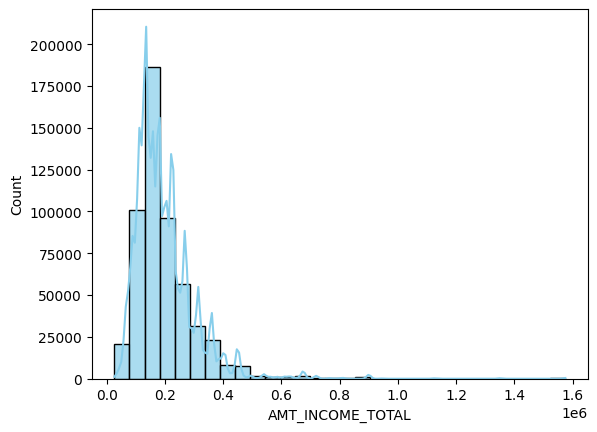

In [ ]:
sns.histplot(df['AMT_INCOME_TOTAL'], bins=30, kde=True, color='skyblue', alpha=0.7)

In [ ]:
df['AMT_INCOME_TOTAL'].describe()

,AMT_INCOME_TOTAL
count,5.376670e+05
mean,1.971171e+05
std,1.041390e+05
min,2.700000e+04
25%,1.350000e+05
50%,1.800000e+05
75%,2.295000e+05
max,1.575000e+06


<Axes: xlabel='AMT_INCOME_TOTAL'>

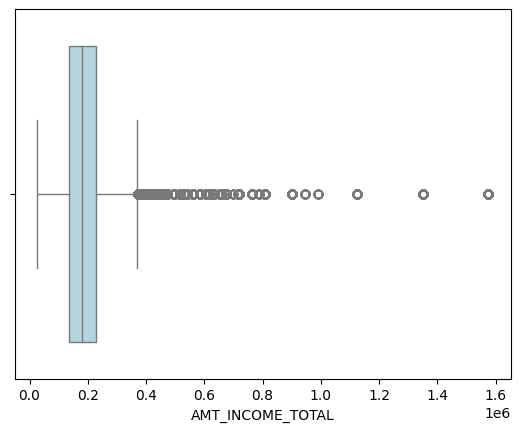

In [ ]:
sns.boxplot(data=df['AMT_INCOME_TOTAL'], color='lightblue',orient="h")

The column AMT_INCOME_TOTAL shows the Annual Income of each people. There are some outliers and there is a group. But we can still try to limit the range of income to make our model more accuracy to advoid extreme values. we can also use standerdize to make it not as huge as what we see now.

In [ ]:
education = df['NAME_EDUCATION_TYPE'].value_counts()
education

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,358317
Higher education,153770
Incomplete higher,20590
Lower secondary,4556
Academic degree,434


<ipython-input-44-8f624bb35842>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=education.index, x=education, palette="viridis")
<ipython-input-44-8f624bb35842>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(education[i] + 0.5, i, f"{education[i]}", color="black", va="center")


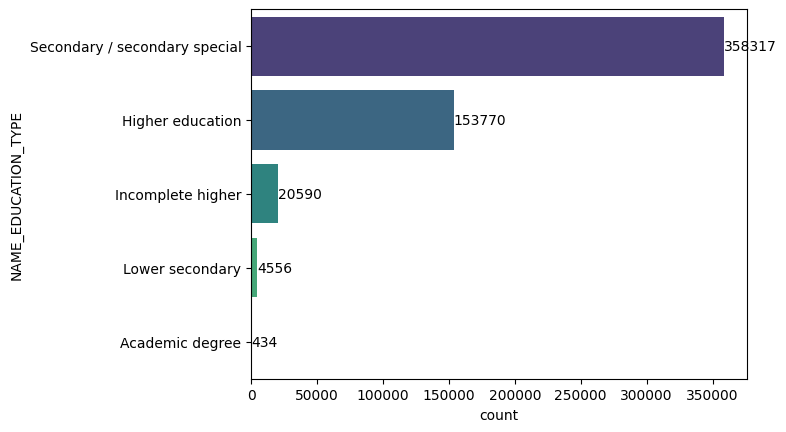

In [ ]:
sns.barplot(y=education.index, x=education, palette="viridis")
for i in range(len(education)):
    plt.text(education[i] + 0.5, i, f"{education[i]}", color="black", va="center")
plt.show()


NAME_EDUCATION_TYPE shows the Education Level of each paticipants and it has five different groups in total. Most of the people were scondary degree and less people were accademic degrees. For this data, we can use label encouding {0~4} or we can also use one-hot encouding. we can also change it to Secondary and higher vs others to make it a binary catigory.

In [ ]:
family_status = df['NAME_FAMILY_STATUS'].value_counts()

<ipython-input-45-5dfef407bf86>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=family_status.index, x=family_status, palette="viridis")
<ipython-input-45-5dfef407bf86>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(family_status[i] + 0.5, i, f"{family_status[i]}", color="black", va="center")


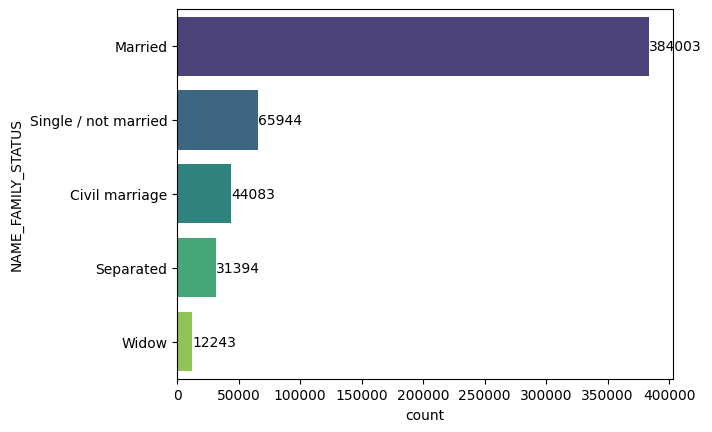

In [ ]:
sns.barplot(y=family_status.index, x=family_status, palette="viridis")
for i in range(len(family_status)):
    plt.text(family_status[i] + 0.5, i, f"{family_status[i]}", color="black", va="center")
plt.show()

NAME_FAMILY_STATUS shows the Marital Status of each paticipants and it have five different groups in total. Most of the people were Married and few people were widow. For this data, we can use label encouding {0~4} or we can also use one-hot encouding. we can also choose one vs others to make it a binary catigory if it is necessary. In this case, since married is majority, we can also set to married and others to reduce the model complexity.

In [ ]:
house_type = df['NAME_HOUSING_TYPE'].value_counts()

<ipython-input-47-453a1ff8b150>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=house_type.index, x=house_type, palette="viridis")
<ipython-input-47-453a1ff8b150>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(house_type[i] + 0.5, i, f"{house_type[i]}", color="black", va="center")


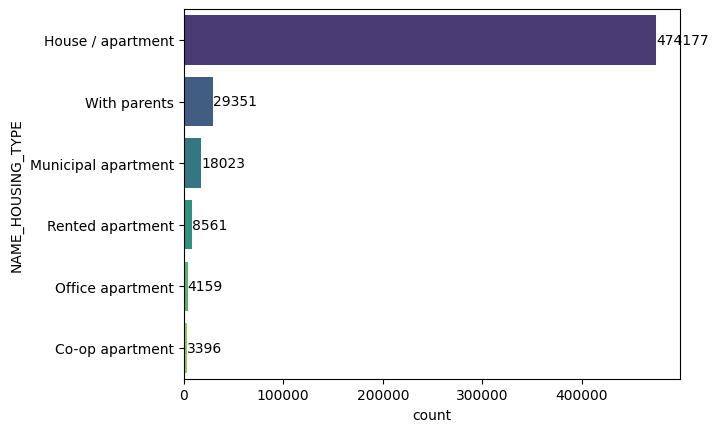

In [ ]:
sns.barplot(y=house_type.index, x=house_type, palette="viridis")
for i in range(len(house_type)):
    plt.text(house_type[i] + 0.5, i, f"{house_type[i]}", color="black", va="center")
plt.show()

NAME_HOUSING_TYPE shows the Way of Living of each paticipants and it have five different groups in total. Most of the people live in a house/apartment, while other housing types are the minority. For this data, we can use label encouding {0~4} or we can also use one-hot encouding. we can also choose vs others to make it a binary catigory if it is necessary. In this case, since House / apartment is majority, we can also set to married and others to reduce the model complexity.

<Axes: xlabel='DAYS_BIRTH'>

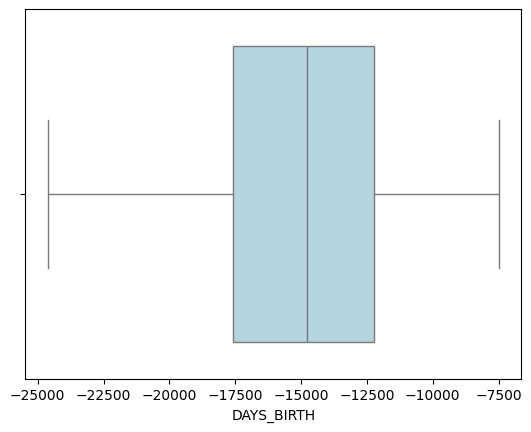

In [ ]:
sns.boxplot(data=df['DAYS_BIRTH'], color='lightblue',orient="h")

In [ ]:
df['DAYS_BIRTH'].describe(percentiles=[0.25,0.5,0.75,1])

count    537667.000000
mean     -15010.958999
std        3416.418092
min      -24611.000000
25%      -17594.000000
50%      -14785.000000
75%      -12239.000000
100%      -7489.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Days_Birth is the feature for subject's age. The negative means the how many days before this dataset is created. Here we can observe the people's average age is around -14785 days, which would be 40 years old. Also, there is no outliers in this features. Even the largest age is around 60s, this feature is pretty cleaning. We just to remove negative sign and convert back to normal years to make it easier to use.

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

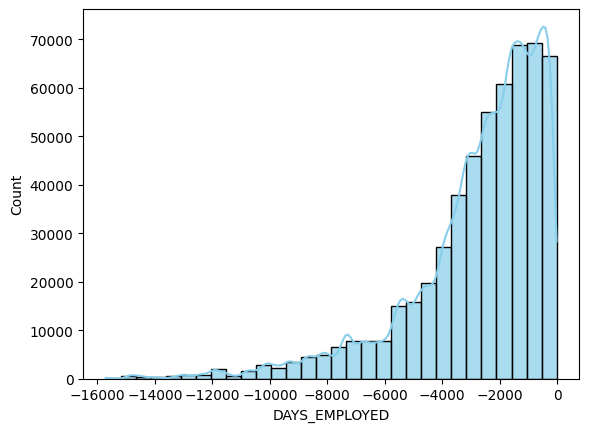

In [ ]:
sns.histplot(df['DAYS_EMPLOYED'], bins=30, kde=True, color='skyblue', alpha=0.7)

<Axes: xlabel='DAYS_EMPLOYED'>

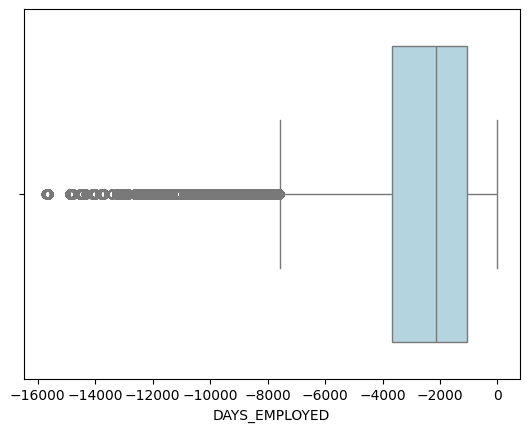

In [ ]:
sns.boxplot(data=df['DAYS_EMPLOYED'], color='lightblue',orient="h")

In [ ]:
df['DAYS_EMPLOYED'].describe(percentiles=[0.25,0.5,0.75,1])

count    537667.000000
mean      -2762.029935
std        2393.919456
min      -15713.000000
25%       -3661.000000
50%       -2147.000000
75%       -1050.000000
100%        -17.000000
max         -17.000000
Name: DAYS_EMPLOYED, dtype: float64

Days_employed works in the same fashion as days_birth. The negative sign means how many work days before the dataset is created, so the more negatiev, the longer work history for a person. This feature has different distribution compared to the age distribution. The days_employed is skewed to the right, indicating a lot of people does not have a long work history. This could be one of the most important features, since a person who has longer work history, they should less likely to default a credit card

In [ ]:
Flag_Mobil_type = df['FLAG_MOBIL'].value_counts()
Flag_Mobil_type

FLAG_MOBIL
1    537667
Name: count, dtype: int64

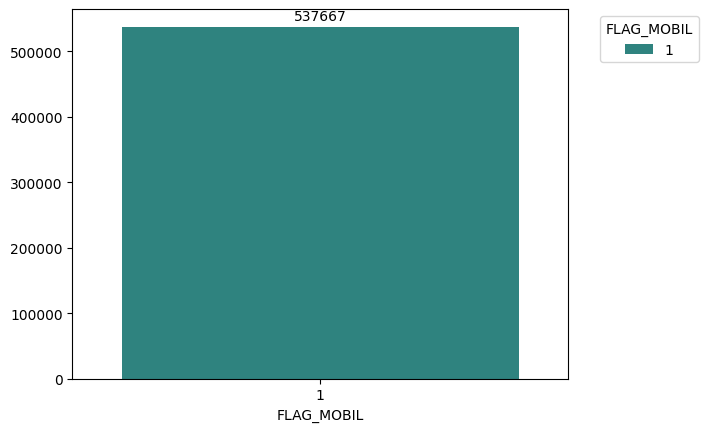

In [ ]:
sns.barplot(y=Flag_Mobil_type.values, x=Flag_Mobil_type.index, palette="viridis",hue=Flag_Mobil_type.index)
for i in range(len(Flag_Mobil_type)):
    plt.text(i, Flag_Mobil_type.values[i] + 10000, f"{Flag_Mobil_type.iloc[i]}", color="black", ha="center")
plt.legend(title="FLAG_MOBIL", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

FLAG_MOBIL indicate whether a person has a mobile phone or not. From the visualization, we can see all subjects have mobile phone, so it cannot provide model with much information, since there is no variance in the feature. Thus, we shouldn't include in our model to increase its complexity.

In [ ]:
FLAG_WORK_PHONE_type = df['FLAG_WORK_PHONE'].value_counts()
print(FLAG_WORK_PHONE_type/ df['FLAG_WORK_PHONE'].value_counts().sum())


FLAG_WORK_PHONE
0    0.718385
1    0.281615
Name: count, dtype: float64


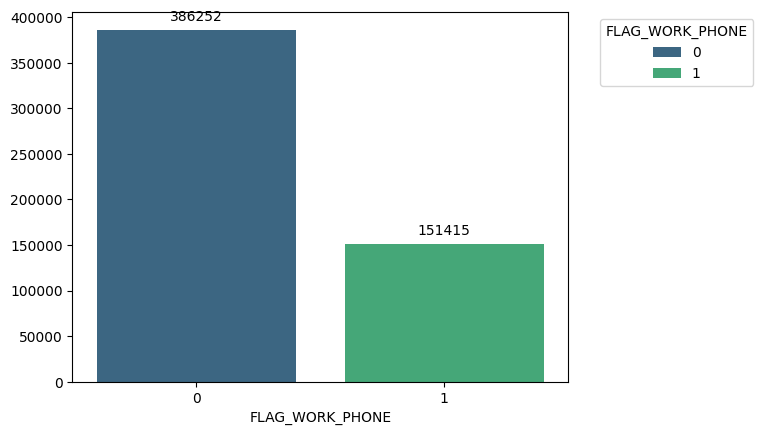

In [ ]:
sns.barplot(y=FLAG_WORK_PHONE_type.values, x=FLAG_WORK_PHONE_type.index, palette="viridis",hue=FLAG_WORK_PHONE_type.index)
for i in range(len(FLAG_WORK_PHONE_type)):
    plt.text(i, FLAG_WORK_PHONE_type.values[i] + 10000, f"{FLAG_WORK_PHONE_type.iloc[i]}", color="black", ha="center")

plt.legend(title="FLAG_WORK_PHONE", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

FLAG_WORK_PHONE indicate whether a person has a work phone or not. This work phone should be used primarily for business purposes. It may be a landline at the office or a mobile phone assigned to an employee to stay connected with colleagues or clients. From the visualization, we can see around 28 % of subjects have the work phone, which should be able to provide some information to our model.If a employee works in a company who assign work phone, they should have a good salary, which is a good sign for credit card loan. Also, since these are binary features, we don't need to do one-hot encoding to increase the complexity.

In [ ]:
FLAG_PHONE_type = df['FLAG_PHONE'].value_counts()
print(FLAG_PHONE_type/ df['FLAG_PHONE'].value_counts().sum())

FLAG_PHONE
0    0.701107
1    0.298893
Name: count, dtype: float64


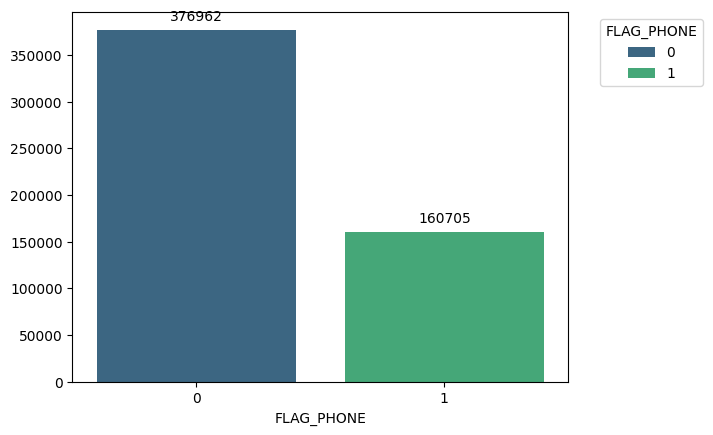

In [ ]:
sns.barplot(y=FLAG_PHONE_type.values, x=FLAG_PHONE_type.index, palette="viridis",hue=FLAG_PHONE_type.index)
for i in range(len(FLAG_PHONE_type)):
    plt.text(i, FLAG_PHONE_type.values[i] + 10000, f"{FLAG_PHONE_type.iloc[i]}", color="black", ha="center")

plt.legend(title="FLAG_PHONE", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

FLAG_PHONE is feature that indicate where a person has a phone/landline phone. This distribution is pretty similar to the work_phone. Around 70% of people does not have a phone/landline, and 30% of people have them, so we need to conduct a correlation analysis to check how correlated features are in our table to avoid multi-linearity.

# Numerical Data Analysis

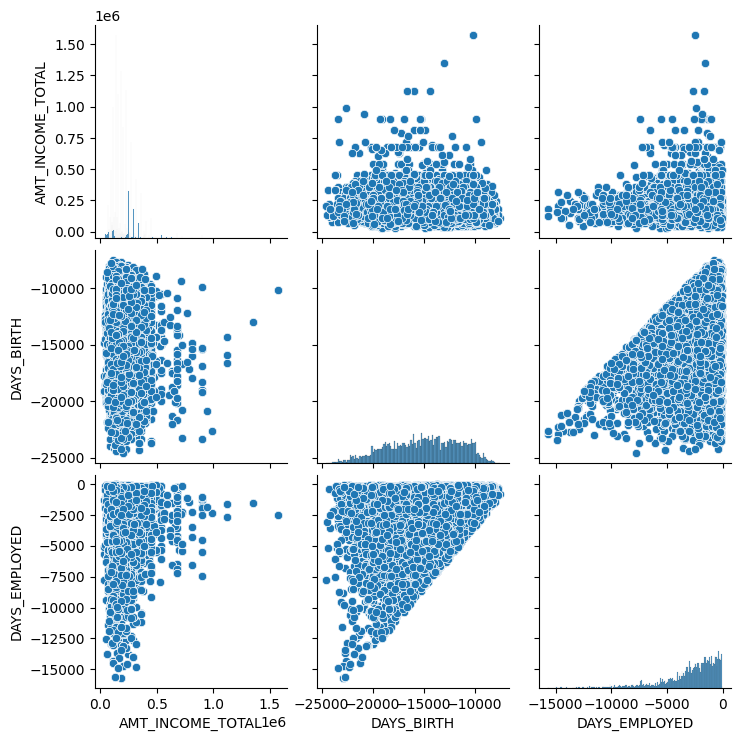

In [4]:
# Select the columns for the pair plot
columns = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

# Create the pair plot
sns.pairplot(df[columns])
plt.show()

We observed an weak correlation between `AMT_INCOME` with both `DAYS_BIRTH` and `DAYS_EMPLOYED`. From the 3 plot in the first row, we can see people who has less work history tend to have a higher salary; however this correlation is not strong. And we can see there are more income outliers from the group who ahs less employed history. From the third plot in the second row, and second plot in the third row, we can observe an trend between `DAYS_BIRTH` and `DAYS_EMPLOYED` that the younger the subject is, the shorter the employeed history, which makes sense since younger people are often newer to the workforce, and therefore they have less accumulated work experience.